<a href="https://colab.research.google.com/github/KhantPhyo/Machine-Learning-with-Python---Scikit-Learn/blob/main/sk5_sklearn_knn_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://www.tutorialspoint.com/scikit_learn/scikit_learn_knn_learning.htm

# Base Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Algorithm and model
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier, RadiusNeighborsRegressor

# DataSets
from sklearn.datasets import load_iris, make_regression

# Preprocessing and TranTestSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Accuracy check
from sklearn import metrics

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X = iris.data[:, :4]
y = iris.target
X.shape, y.shape
#print(X)

((150, 4), (150,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [7]:
print("X_Train : \n",X_train[:5,:],"\nX_test : \n", X_test[:5,:])

X_Train : 
 [[5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]] 
X_test : 
 [[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]


StandardScaler is a preprocessing technique in scikit-learn that is used for standardizing a dataset. Standardization is a common preprocessing step in machine learning where the features of the dataset are transformed to have zero mean and unit variance. This is done to ensure that the features are on the same scale, which can be important for some machine learning algorithms.

---

Purpose:

The goal of StandardScaler is to transform the features of a dataset so that they have a mean of 0 and a standard deviation of 1. This is achieved by subtracting the mean and dividing by the standard deviation for each feature independently.

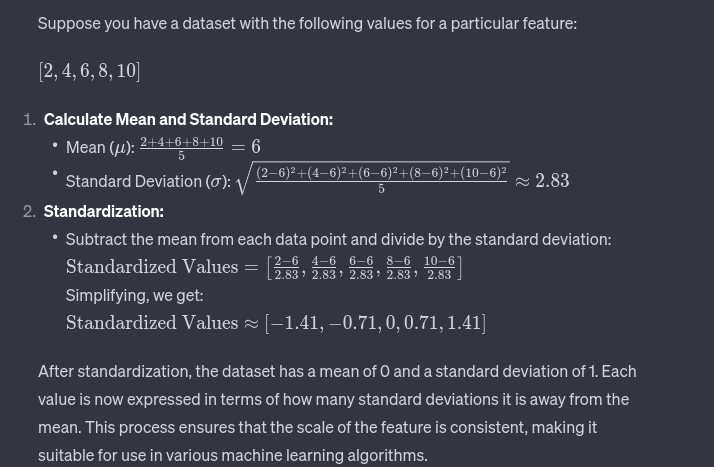

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
print("X_train : \n",X_train[:5,:],"\nX_test : \n",X_test[:5,:])

X_train : 
 [[-1.02366372 -2.37846268 -0.18295039 -0.29318114]
 [ 0.69517462 -0.10190314  0.93066067  0.7372463 ]
 [ 0.92435306  0.58106472  1.04202177  1.63887031]
 [ 0.1222285  -1.92315077  0.6522579   0.35083601]
 [ 0.92435306 -1.24018291  1.09770233  0.7372463 ]] 
X_test : 
 [[-0.10694994 -0.55721505  0.70793846  1.51006688]
 [ 0.1222285  -1.92315077  0.09545238 -0.29318114]
 [-0.45071761  2.6299683  -1.35224199 -1.32360858]
 [ 1.6118884  -0.32955909  1.37610509  0.7372463 ]
 [-1.02366372  0.80872067 -1.29656144 -1.32360858]]


KNeighborsClassifier is a supervised learning algorithm. Supervised learning involves training a model on a labeled dataset, where the input data is paired with corresponding output labels. The algorithm learns to map input features to the correct output labels during the training phase. In the case of KNeighborsClassifier, it memorizes the training data to make predictions on new, unseen data.

Applications:

Image recognition, text classification, medical diagnosis, recommendation systems, and many other classification tasks.

In [13]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)
score

0.9777777777777777

In [14]:
range_k = range(1,15)
scores = {}
scores_list = []

- The metrics.confusion_matrix function in scikit-learn is used to compute the confusion matrix, which is a table that summarizes the performance of a classification algorithm. The confusion matrix breaks down the count of true positives, true negatives, false positives, and false negatives.

- - y_test: The true labels of the testing set.
- - y_pred: The predicted labels from the classifier.
- The confusion matrix result is a 2x2 matrix (for binary classification) or an NxN matrix (for N-class classification) where the rows represent the actual classes and the columns represent the predicted classes. The elements of the matrix are counts of instances falling into different categories.

#metrics.classification_report:
The metrics.classification_report function in scikit-learn generates a text report showing the main classification metrics. It includes precision, recall, F1-score, and support for each class, as well as averages.

- Precision: The ratio of true positives to the sum of true positives and false positives. It measures the accuracy of positive predictions.
- Recall (Sensitivity): The ratio of true positives to the sum of true positives and false negatives. It measures the ability of the classifier to capture positive instances.
- F1-score: The harmonic mean of precision and recall. It is a balance between precision and recall.
- Support: The number of actual occurrences of each class in the specified dataset.

## Additional Metrics:
- Accuracy: The proportion of correctly classified instances among the total instances. It is not class-specific and represents an overall measure of the model's correctness.

- Macro Avg (Macro-Averaging): The unweighted average of precision, recall, and F1-score across all classes. It treats all classes equally.

- Weighted Avg (Weighted-Averaging): The average of precision, recall, and F1-score, weighted by the number of instances in each class. It considers class imbalance.

In [15]:
for k in range_k:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))
  result = metrics.confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(result)
  result1 = metrics.classification_report(y_test, y_pred)
  print("Classification Report:",)
  print (result1)

Confusion Matrix:
[[16  0  0]
 [ 0 16  2]
 [ 0  1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.89      0.91        18
           2       0.83      0.91      0.87        11

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Classification Report:
    

In [16]:
scores

{1: 0.9333333333333333,
 2: 0.9555555555555556,
 3: 0.9777777777777777,
 4: 0.9777777777777777,
 5: 0.9777777777777777,
 6: 0.9777777777777777,
 7: 0.9777777777777777,
 8: 0.9777777777777777,
 9: 0.9777777777777777,
 10: 0.9777777777777777,
 11: 0.9777777777777777,
 12: 0.9777777777777777,
 13: 0.9777777777777777,
 14: 0.9777777777777777}

In [17]:
scores_list

[0.9333333333333333,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

Text(0, 0.5, 'Accuracy')

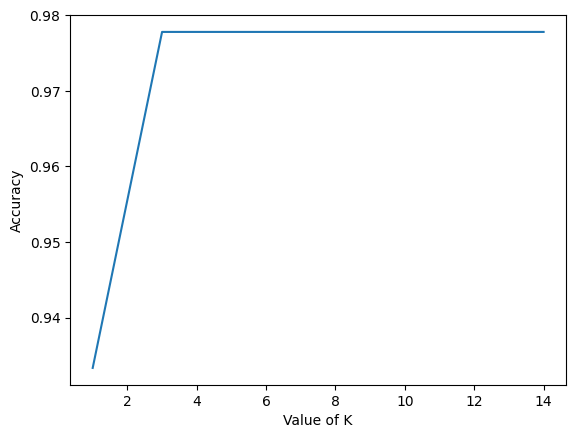

In [18]:
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

- RadiusNeighborsClassifier is a supervised learning algorithm. In supervised learning, the algorithm is trained on a labeled dataset, where each data point is associated with a known class label. The algorithm learns to make predictions on new, unseen data based on the patterns it has learned during training.

- Parameter: The key parameter in RadiusNeighborsClassifier is the radius itself (radius parameter). It determines the maximum distance to consider when looking for neighbors.

- Data Type : RadiusNeighborsClassifier can be applied to both numerical and categorical data. Like KNeighborsClassifier, it operates on the distances between data points, making it suitable for various types of data.

- Applications: Image recognition, text classification, and other classification tasks where the decision boundary may not be well-defined or linear.

## Difference:

KNeighborsClassifier considers a fixed number of neighbors (defined by n_neighbors), while RadiusNeighborsClassifier considers all neighbors within a specified radius.


In [19]:
radius = range(1,15)
scores = {}
scores_list = []
for r in radius:
  classifier = RadiusNeighborsClassifier(radius = r)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  scores[r] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [20]:
scores

{1: 0.9777777777777777,
 2: 0.8,
 3: 0.6888888888888889,
 4: 0.6222222222222222,
 5: 0.35555555555555557,
 6: 0.24444444444444444,
 7: 0.24444444444444444,
 8: 0.24444444444444444,
 9: 0.24444444444444444,
 10: 0.24444444444444444,
 11: 0.24444444444444444,
 12: 0.24444444444444444,
 13: 0.24444444444444444,
 14: 0.24444444444444444}

Text(0, 0.5, 'Accuracy')

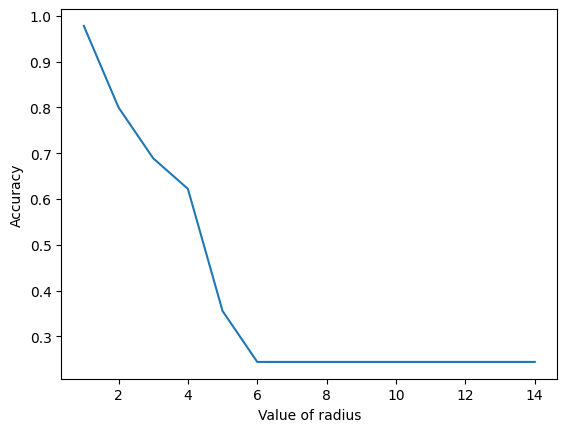

In [21]:
plt.plot(radius,scores_list)
plt.xlabel("Value of radius")
plt.ylabel("Accuracy")

# Let Start for Regression

In [22]:
X, y = make_regression(n_features = 4, random_state = 0)
X.shape, y.shape

((100, 4), (100,))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((70, 4), (30, 4))

KNeighborsRegressor is a supervised learning algorithm. In supervised learning, the algorithm is trained on a labeled dataset, where each data point is associated with a known continuous target value. The algorithm learns to make predictions on new, unseen data based on the patterns it has learned during training.

Principle:

- The algorithm predicts the target value for a data point by considering the average (or another aggregation function) of the target values of its k-nearest neighbors in the feature space.
Parameter:

- The key parameter in KNeighborsRegressor is the number of neighbors (n_neighbors). It determines how many neighboring data points influence the prediction.


Data Type:

- KNeighborsRegressor can be applied to numerical data, as it operates on the distances between data points. It is suitable for regression tasks where the target variable is continuous.

Applications:

- Predicting house prices, estimating stock prices, and other regression tasks where the relationships between input features and target variables are not assumed to be linear.

In [24]:
range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
  knnr = KNeighborsRegressor(n_neighbors=k)
  knnr.fit(X_train, y_train)
  y_pred = knnr.predict(X_test)
  scores[k] = metrics.mean_squared_error(y_test,y_pred)
  scores_list.append(metrics.mean_squared_error(y_test,y_pred))

In [25]:
scores

{1: 2687.498050005207,
 2: 1973.3558055180174,
 3: 2407.638886190778,
 4: 2504.9745675221525,
 5: 2911.2919795883445,
 6: 2905.1082372797614,
 7: 3146.558881476807,
 8: 3036.140890489178,
 9: 3199.909450240992,
 10: 3236.208808580049,
 11: 3168.142394024933,
 12: 3219.31035887661,
 13: 3410.138916137484,
 14: 3551.926767737263}

Text(0, 0.5, 'MSE')

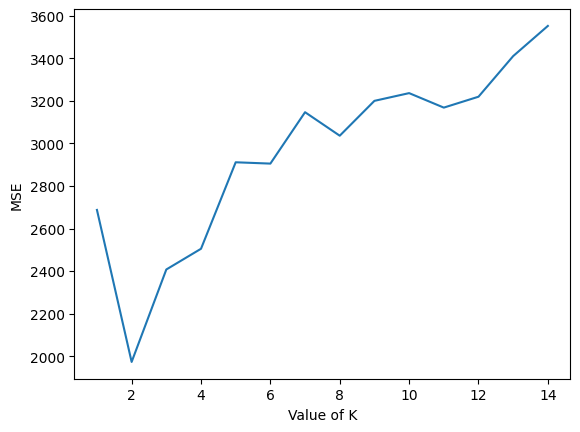

In [26]:
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("MSE")

RadiusNeighborsRegressor is a supervised learning algorithm. In supervised learning, the algorithm is trained on a labeled dataset, where each data point is associated with a known continuous target value. The algorithm learns to make predictions on new, unseen data based on the patterns it has learned during training.

---

Principle:

The algorithm predicts the target value for a data point by considering the average (or another aggregation function) of the target values of its neighbors within a specified radius in the feature space.
Parameter:

The key parameter in RadiusNeighborsRegressor is the radius (radius). It determines the maximum distance to consider when looking for neighbors.

---

Data Type:

RadiusNeighborsRegressor can be applied to numerical data, as it operates on the distances between data points. It is suitable for regression tasks where the target variable is continuous.
Data Requirements:

Feature scaling is recommended for RadiusNeighborsRegressor to ensure that all features contribute equally to the distance calculation.
---

Use Cases:
Applications:

Predicting house prices, estimating stock prices, and other regression tasks where the relationships between input features and target variables are not assumed to be linear.

In [27]:
radius = range(1,15)
scores = {}
scores_list = []
for r in radius:
  regr = RadiusNeighborsRegressor(radius = r)
  regr.fit(X_train, y_train)
  y_pred = regr.predict(X_test)
  try:
    scores[r] = metrics.mean_squared_error(y_test,y_pred)
    scores_list.append(metrics.mean_squared_error(y_test,y_pred))
  except Exception as e:
    print(e)

Input contains NaN.


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


In [28]:
scores

{2: 3815.284868926949,
 3: 7751.601466402394,
 4: 12665.17433009503,
 5: 14970.695177443233,
 6: 15436.662432452138,
 7: 15436.662432452138,
 8: 15436.662432452138,
 9: 15436.662432452138,
 10: 15436.662432452138,
 11: 15436.662432452138,
 12: 15436.662432452138,
 13: 15436.662432452138,
 14: 15436.662432452138}

Text(0, 0.5, 'MSE')

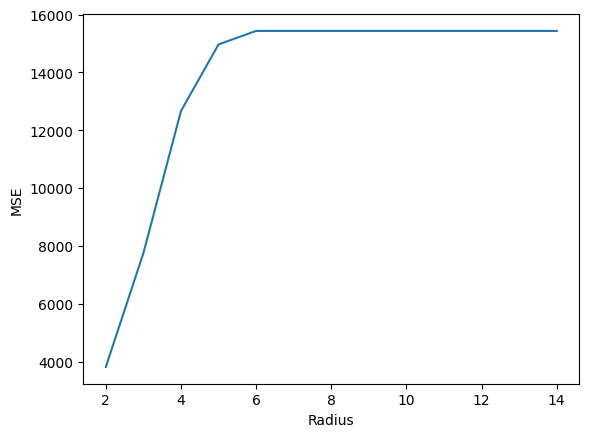

In [29]:
plt.plot(range(2,15),scores_list)
plt.xlabel("Radius")
plt.ylabel("MSE")

In [30]:
#df -> (algo, k, accu)
X = iris.data[:, :4]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [31]:
def get_knn():
  for k in range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)
    scores = {'algo': 'KNN', 'k': k, 'acc': acc}
    print(scores)
    scores_list.append(scores)

In [32]:
def get_rnn():
  for r in range_k:
    classifier = RadiusNeighborsClassifier(radius = r)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)
    scores = {'algo': 'RNN', 'k': r, 'acc': acc}
    print(scores)
    scores_list.append(scores)

In [33]:
range_k = range(1,15)
scores_list = []
get_knn()
get_rnn()
len(scores_list)

{'algo': 'KNN', 'k': 1, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 2, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 3, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 4, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 5, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 6, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 7, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 8, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 9, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 10, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 11, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 12, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 13, 'acc': 0.9777777777777777}
{'algo': 'KNN', 'k': 14, 'acc': 0.9777777777777777}
{'algo': 'RNN', 'k': 1, 'acc': 0.9555555555555556}
{'algo': 'RNN', 'k': 2, 'acc': 0.8666666666666667}
{'algo': 'RNN', 'k': 3, 'acc': 0.6666666666666666}
{'algo': 'RNN', 'k': 4, 'acc': 0.6}
{'algo': 'RNN', 'k': 5, 'acc': 0.6}
{'algo': 'RNN', 'k': 6, 'acc': 0.37777777777777777}
{'al

28

In [34]:
df = pd.DataFrame(scores_list)
df.shape

(28, 3)

In [35]:
df.head()

,algo,k,acc
0,KNN,1,0.977778
1,KNN,2,0.977778
2,KNN,3,0.977778
3,KNN,4,0.977778
4,KNN,5,0.977778


In [ ]:
df.tail()

,algo,k,acc
23,RNN,10,0.244444
24,RNN,11,0.244444
25,RNN,12,0.244444
26,RNN,13,0.244444
27,RNN,14,0.244444


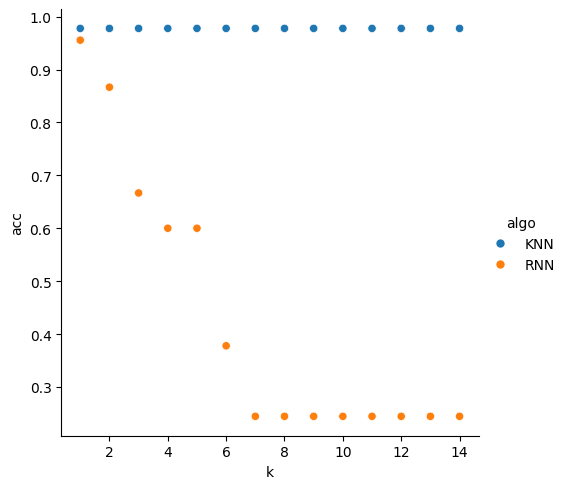

In [36]:
sns.relplot(data=df, x='k', y='acc', hue='algo')

In [37]:
X, y = make_regression(n_features = 4, random_state = 0)
X.shape, y.shape

((100, 4), (100,))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((70, 4), (30, 4))

In [39]:
def get_knn_reg():
  for k in range_k:
    knnr = KNeighborsRegressor(n_neighbors=k)
    knnr.fit(X_train, y_train)
    y_pred = knnr.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    scores = {'algo': 'KNN', 'k': k, 'MSE': MSE}
    print(scores)
    scores_list.append(scores)

In [40]:
def get_rnn_reg():
  for r in range_k:
    regr = RadiusNeighborsRegressor(radius = r)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    try:
      MSE = metrics.mean_squared_error(y_test,y_pred)
      scores = {'algo': 'RNN', 'k': r, 'MSE': MSE}
      print(scores)
      scores_list.append(scores)
    except Exception as e:
      print(e)

In [41]:
range_k = range(1,15)
scores_list = []
get_knn_reg()
get_rnn_reg()
len(scores_list)

{'algo': 'KNN', 'k': 1, 'MSE': 2687.498050005207}
{'algo': 'KNN', 'k': 2, 'MSE': 1973.3558055180174}
{'algo': 'KNN', 'k': 3, 'MSE': 2407.638886190778}
{'algo': 'KNN', 'k': 4, 'MSE': 2504.9745675221525}
{'algo': 'KNN', 'k': 5, 'MSE': 2911.2919795883445}
{'algo': 'KNN', 'k': 6, 'MSE': 2905.1082372797614}
{'algo': 'KNN', 'k': 7, 'MSE': 3146.558881476807}
{'algo': 'KNN', 'k': 8, 'MSE': 3036.140890489178}
{'algo': 'KNN', 'k': 9, 'MSE': 3199.909450240992}
{'algo': 'KNN', 'k': 10, 'MSE': 3236.208808580049}
{'algo': 'KNN', 'k': 11, 'MSE': 3168.142394024933}
{'algo': 'KNN', 'k': 12, 'MSE': 3219.31035887661}
{'algo': 'KNN', 'k': 13, 'MSE': 3410.138916137484}
{'algo': 'KNN', 'k': 14, 'MSE': 3551.926767737263}
Input contains NaN.
{'algo': 'RNN', 'k': 2, 'MSE': 3815.284868926949}
{'algo': 'RNN', 'k': 3, 'MSE': 7751.601466402394}
{'algo': 'RNN', 'k': 4, 'MSE': 12665.17433009503}
{'algo': 'RNN', 'k': 5, 'MSE': 14970.695177443233}
{'algo': 'RNN', 'k': 6, 'MSE': 15436.662432452138}
{'algo': 'RNN', 'k':

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


27

In [42]:
df_reg = pd.DataFrame(scores_list)
df_reg.shape

(27, 3)

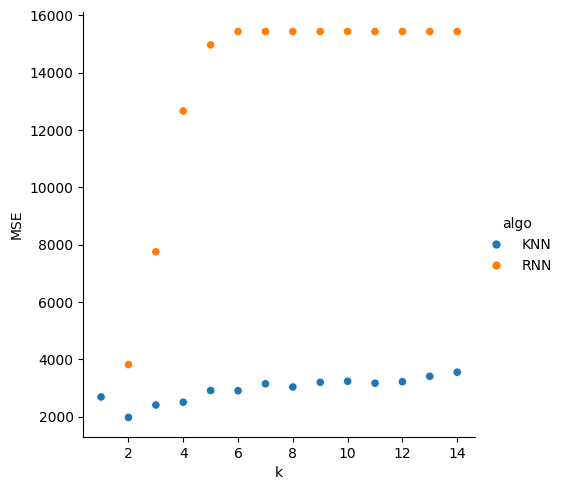

In [43]:
sns.relplot(data=df_reg, x='k', y='MSE', hue='algo')